### Build CNN model  
##### 使用 Dropout跟 L2 regularization

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import Activation, Input

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Input(shape=(255, 255, 3))) # 255*255 pixel, 3 :RGB

# 第一層卷積層
model.add(Conv2D(filters=32, # filter(卷積核個數，也就是每一格階段的輸出面數/深度):32，白話：輸出32個feature map
         kernel_size=(3,3), # kernel_size(卷積核大小):3, 3
         padding = 'same', # 填充
         ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), # MaxPoolSize:2*2，降躁跟減少運算資源
            padding='same'))
model.add(Dropout(0.5))

# 第二層卷積層
model.add(Conv2D(filters=64,
         kernel_size=(3,3),
         padding='same', # 填充
         ))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), # MaxPoolSize:2*2，降躁跟減少運算資源
            padding='same'))
model.add(Dropout(0.5)) # Drop掉50%的神經元以避免 Overfitting

# 全連接層
model.add(Flatten()) # 平坦化

model.add(Dense(units = 256, activation = 'relu')) # units：輸出維度(即神經元的數量)
model.add(Dropout(0.5))

# 輸出層
# 要做三元分類，所以輸出層用 softmax function，output node 為 3
model.add(Dense(units=3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 255, 255, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      67,109,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,129,283 (256.08 MB)

 Trainable params: 67,129,283 (256.08 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
'''
優化梯度下降, 參考資料: 
https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db
https://kilong31442.medium.com/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%90%84%E7%A8%AE%E6%96%B0%E5%84%AA%E5%8C%96%E5%99%A8%E4%BB%8B%E7%B4%B9-lookahead-ranger-lars-830ca2250dd5
'''
model.compile(loss='binary_crossentropy',
       optimizer=Adam(learning_rate=0.001),
       metrics=['accuracy'])

### 將資料餵給神經網路

In [19]:
# 設置訓練集資料夾路徑
train_dir = r'C:\Users\amysa\anaconda3\envs\cv\00\Machine Learning\Potato_Disease_Detection\potato_disease_Dataset\train'

# 設置測試集資料夾路徑
test_dir = r'C:\Users\amysa\anaconda3\envs\cv\00\Machine Learning\Potato_Disease_Detection\potato_disease_Dataset\test'

# 設置驗證集資料夾路徑
val_dir = r'C:\Users\amysa\anaconda3\envs\cv\00\Machine Learning\Potato_Disease_Detection\potato_disease_Dataset\val'

# 自定義圖片數據生成器
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# 使用 flow_from_directory 方法生成訓練集資料
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(255, 255),  # 調整所有圖片的大小成為 255x255
    batch_size=32,
    class_mode='categorical'
)

# 使用 flow_from_directory 方法生成測試集資料
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

# 使用 flow_from_directory 方法生成驗證集資料
valid_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(255, 255),
    batch_size=32,
    class_mode='categorical'
)

# 將數據餵給模型進行訓練
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator
)

Found 4200 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Epoch 1/30


C:\Users\amysa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 508s 4s/step - accuracy: 0.5236 - loss: 2.6727 - val_accuracy: 0.9483 - val_loss: 0.2796
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - accuracy: 0.8978 - loss: 0.2274 - val_accuracy: 0.9850 - val_loss: 0.1298
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.9492 - loss: 0.1311 - val_accuracy: 0.9533 - val_loss: 0.1053
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 482s 4s/step - accuracy: 0.9644 - loss: 0.0997 - val_accuracy: 0.9700 - val_loss: 0.0981
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 479s 4s/step - accuracy: 0.9663 - loss: 0.0915 - val_accuracy: 0.9900 - val_loss: 0.0631
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 476s 4s/step - accuracy: 0.9829 - loss: 0.0614 - val_accuracy: 0.8933 - val_loss: 0.1780
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 482s 4s/step - accuracy: 0.9795 - loss: 0.0660 - val_accuracy: 0.9783 - val_loss: 0.0634
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 479s 4s/step - accuracy: 0.9831 - loss: 0.0571 - val_accuracy: 0.993

### 畫出 loss & accuracy 的圖

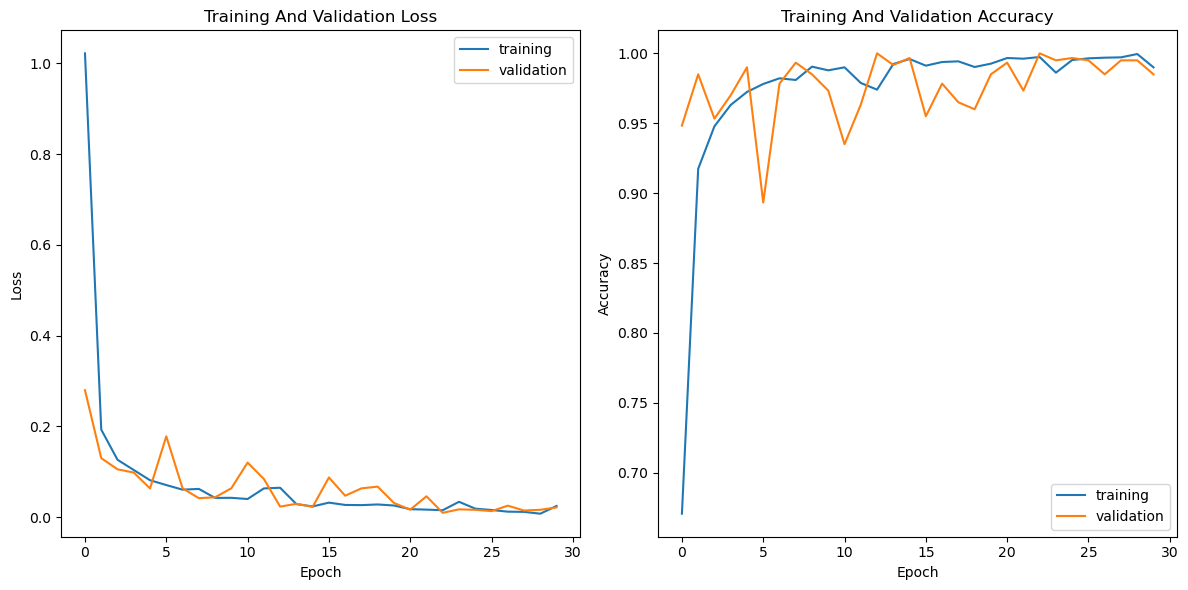

In [20]:
plt.figure(figsize=(12, 6))

# loss
plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'], loc='upper right')
plt.title('Training And Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'], loc='lower right')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()  # 自動調整圖的間距
plt.savefig('./Training And Validation Accuracy.jpg')
plt.show()

In [21]:
test_loss , test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss,test_acc))

C:\Users\amysa\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 919ms/step - accuracy: 0.9712 - loss: 0.0564
test loss:0.0609939768910408 test acc:0.9683333039283752


In [24]:
# Save the model
model.save("cnn_model.keras")